# Melbourne Housing Market

#### Data Source:
https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

### FEATURE DESCRIPTION

Some Key Details:
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitoryRooms

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

import warnings 
warnings.filterwarnings("ignore")


#### Overview

In [2]:
# load dataset
df = pd.read_csv("melbourne_housing_full.csv")

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [5]:
df.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
27191,Mount Waverley,13 Malcolm Ct,3,h,1400000.0,SP,Harcourts,11/11/2017,14.2,3149.0,...,1.0,1.0,NaN,NaN,NaN,Monash City Council,-37.87630,145.11220,Eastern Metropolitan,13366.0
14404,Glenroy,2/15 Ogden St,3,t,525000.0,S,Jellis,1/07/2017,11.2,3046.0,...,1.0,1.0,194.0,133.0,2011.0,Moreland City Council,-37.70168,144.94862,Northern Metropolitan,8870.0
14233,Altona North,30 Marigold Av,3,h,NaN,PN,Gunn&Co,1/07/2017,9.4,3025.0,...,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,5132.0
11984,Cremorne,56 Wellington St,3,h,1900000.0,VB,Jellis,18/06/2016,2.5,3121.0,...,2.0,2.0,263.0,166.0,2016.0,Yarra City Council,-37.82660,144.98940,Northern Metropolitan,1123.0
30916,Wollert,1 Hotspur Dr,4,h,NaN,SP,Love,9/12/2017,25.5,3750.0,...,2.0,2.0,445.0,200.0,2012.0,Whittlesea City Council,-37.61831,145.02372,Northern Metropolitan,2940.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

> cek data info

In [7]:
# cek null values
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

> cek null values, ada 14 kolom yang berisi null dari total 21 kolom

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


> lihat measure of central tendency, quantile, min dan max pada setiap features.

In [9]:
df.describe(include = 'object').T

,count,unique,top,freq
Suburb,34857,351,Reservoir,844
Address,34857,34009,5 Charles St,6
Type,34857,3,h,23980
Method,34857,9,S,19744
SellerG,34857,388,Jellis,3359
Date,34857,78,28/10/2017,1119
CouncilArea,34854,33,Boroondara City Council,3675
Regionname,34854,8,Southern Metropolitan,11836


> data diatas adalah data selain numeric 

## PREPROCESSING 

Ubah beberapa tipe data yang tidak sesuai.

In [10]:
# ubah tipe data 
df["Date"] = pd.to_datetime(df['Date'])

In [11]:
# cek tipe data setelah di ubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

> Drop kolom yang tidak di perlukan 

In [12]:
#buat variable baru sebelum di drop
df1 = df.copy()

In [13]:
df1 = df1.drop(['Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude'], axis=1)

In [14]:
df1.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,CouncilArea,Regionname,Propertycount
11334,Hawthorn East,16 Stewart St,4,h,NaN,SN,Kay,2017-04-03,7.5,3123.0,Boroondara City Council,Southern Metropolitan,6482.0
2680,Camberwell,34 Fairmont Av,4,h,NaN,S,Marshall,2017-11-03,7.8,3124.0,Boroondara City Council,Southern Metropolitan,8920.0
15032,Hawthorn,14/36 Lisson Gr,1,u,560000.0,S,Kay,2017-03-06,5.3,3122.0,Boroondara City Council,Southern Metropolitan,11308.0
2104,Brighton East,39 Ferguson St,3,h,1100000.0,S,HAR,2017-02-25,10.7,3187.0,Bayside City Council,Southern Metropolitan,6938.0
27580,Brooklyn,36 Primula Av,3,h,860000.0,SP,Nelson,2017-11-18,6.4,3012.0,Brimbank City Council,Western Metropolitan,962.0


### Handling Null Values

> dibawah ini masih ada beberapa null values yang harus kita handling

In [15]:
df1.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
CouncilArea         3
Regionname          3
Propertycount       3
dtype: int64

> Distance,Postcode,CouncilArea,Regionname dan propertycount di isi dengan metode `ffill()` yaitu mengisi dengan nilai pada baris sebelumnya (atas)

In [16]:
df1["Distance"] = df1["Distance"].ffill()
df1["Postcode"] = df1["Postcode"].ffill()
df1["CouncilArea"] = df1["CouncilArea"].ffill()
df1["Regionname"] = df1["Regionname"].ffill()
df1["Propertycount"] = df1["Propertycount"].ffill()

In [17]:
df1.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
CouncilArea         0
Regionname          0
Propertycount       0
dtype: int64

In [18]:
# pecah kedalam variable baru
df_null = df1[df1["Price"].isna()]
df_not_null = df1[df1["Price"].notna()]

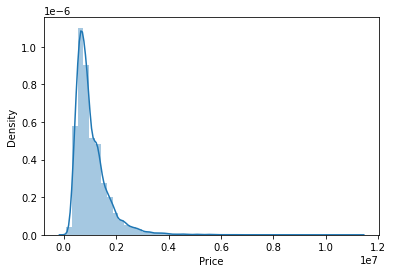

In [19]:
# cek distribusi data
sns.distplot(df_not_null["Price"])
plt.show()

In [20]:
# cek skewness 
stats.skewtest(df_not_null["Price"])

SkewtestResult(statistic=102.99975472168916, pvalue=0.0)

In [21]:
# kurtosis dengan bantuan scipy
stats.kurtosistest(df_not_null["Price"])

KurtosistestResult(statistic=73.94395155543975, pvalue=0.0)

> dari plot diatas hasil skewness test nya adalah 102 yang artinya highly skewed, dan hasil kurtosis test nya adalah 73 yang berarti distribusi nya leptokurtic

In [22]:
# gunakan groupby untuk langsung mengetahui nilai median
df_not_null.groupby(["Type", "Regionname"], as_index=False)["Price"].median()

,Type,Regionname,Price
0,h,Eastern Metropolitan,1115000.0
1,h,Eastern Victoria,690000.0
2,h,Northern Metropolitan,860250.0
3,h,Northern Victoria,565000.0
4,h,South-Eastern Metropolitan,870000.0
5,h,Southern Metropolitan,1660000.0
6,h,Western Metropolitan,815000.0
7,h,Western Victoria,412625.0
8,t,Eastern Metropolitan,885000.0
9,t,Eastern Victoria,665000.0


In [23]:
# cara dengan loop
# cara dengan loop
price = []
for typee, Reg in zip(df_null["Type"], df_null["Regionname"]):
    if typee == "h":
        if Reg == "Eastern Metropolitan":
            price.append(1115000) # append nilai sesuai dengan kriteria
        elif Reg == "Eastern Victoria":
            price.append(690000)
        elif Reg == "Northern Metropolitan":
            price.append(860250)
        elif Reg == "Northern Victoria":
            price.append(565000)
        elif Reg == "South-Eastern Metropolitan":
            price.append(870000)
        elif Reg == "Southern Metropolitan":
            price.append(1660000)
        elif Reg == "Western Metropolitan":
            price.append(815000)
        elif Reg == "Western Victoria":
            price.append(412625)
    
    elif typee == "t":
        if Reg == "Eastern Metropolitan":
            price.append(885000)
        elif Reg == "Eastern Victoria":
            price.append(665000)
        elif Reg == "Northern Metropolitan":
            price.append(685000)
        elif Reg == "Northern Victoria":
            price.append(648000)
        elif Reg == "South-Eastern Metropolitan":
            price.append(813000)
        elif Reg == "Southern Metropolitan":
            price.append(1190000)
        elif Reg == "Western Metropolitan":
            price.append(713500)
    else:
        if Reg == "Eastern Metropolitan":
            price.append(669000)
        elif Reg == "Eastern Victoria":
            price.append(447000)
        elif Reg == "Northern Metropolitan":
            price.append(512000)
        elif Reg == "Northern Victoria":
            price.append(530000)
        elif Reg == "South-Eastern Metropolitan":
            price.append(595000)
        elif Reg == "Southern Metropolitan":
            price.append(630000)
        elif Reg == "Western Metropolitan":
            price.append(480000)
        elif Reg == "Western Victoria":
            price.append(285000)
        

In [24]:
# masukan lagi hasilnya ke data 
df_null["Price"] = price

In [25]:
# kemudian di gabungkan lagi dengan concat
df_merged = pd.concat([df_not_null, df_null])

In [26]:
# cek hasilnya
df_merged.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

> setelah di handling semua null pada data sudah tidak ada

### Handling Outliers

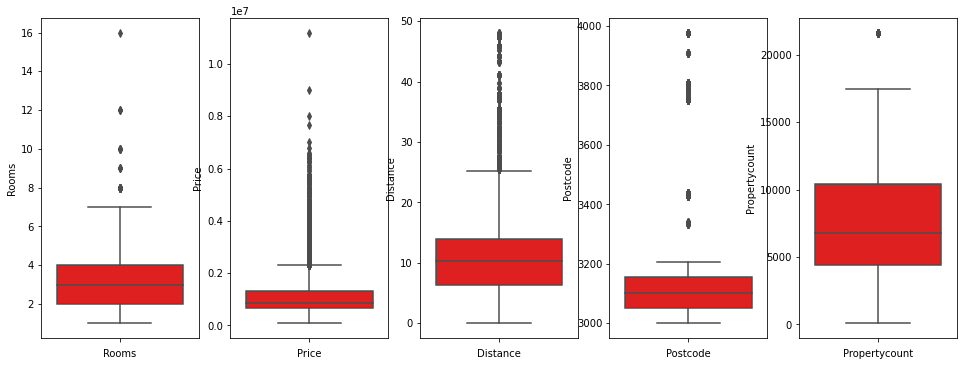

In [27]:
# cek outlier
plt.figure(figsize=(30,20))
features = ["Rooms", "Price", "Distance", "Postcode", "Propertycount"]
for i in range(0, len(features)):
    plt.subplot(3, 9, i+1)
    sns.boxplot(y=df_merged[features[i]], color ='red',orient='h')
    plt.xlabel(features[i])

> Terdapat banyak outlier yang harus di handling

In [28]:
# gunakan fungsi untuk mencari quantile dan outliers
def find_outliers(data):
    
    # hitung nilai Q1 dan Q3
    Q1 = np.quantile(data, .25)
    Q3 = np.quantile(data, .75)
    
    # hitung nilai IQR
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    
    #looping dan append outliers
    low_out = []
    upper_out = []
    
    for i in data:
        if (i < min_IQR):
            low_out.append(i)
        if (i > max_IQR):
            upper_out.append(i)
            
    return low_out, upper_out

> mendeteksi dan menghilangkan outlier di kolom Rooms

In [29]:
# cari outliers baru dengan fungsi IQR
lower_out = find_outliers(df_merged['Rooms'])[0]
upper_out = find_outliers(df_merged['Rooms'])[1]

In [30]:
print(len(lower_out))
print(len(upper_out))

0
33


In [31]:
# hitung nilai IQR dan batas atas
iqr = df_merged["Rooms"].quantile(.75) - df_merged["Rooms"].quantile(.25)
upper_limit = df_merged["Rooms"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 7.0


In [32]:
# cari batasan quantile untuk winsorize
df_merged["Rooms"].quantile(.95)

5.0

In [33]:
# copy dataframe
df_win = df_merged.copy()

In [34]:
df_win["Rooms_wins"] = stats.mstats.winsorize(df_merged["Rooms"], limits=(0, 0.05))

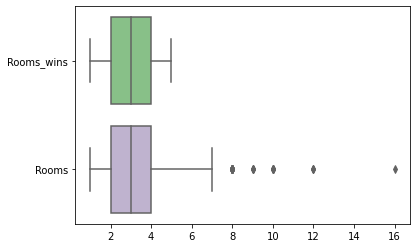

In [35]:
# visualisasi dengan boxplot
sns.boxplot(data=df_win[["Rooms_wins", "Rooms"]], palette="Accent", orient="h")
plt.show()

> deteksi outlier dan menghilangkanya di kolom price

In [36]:
# cari outliers baru dengan fungsi IQR
lower_out = find_outliers(df_merged['Price'])[0]
upper_out = find_outliers(df_merged['Price'])[1]

In [37]:
print(len(lower_out))
print(len(upper_out))

0
1222


In [38]:
# hitung nilai IQR dan batas atas
iqr = df_merged["Price"].quantile(.75) - df_merged["Price"].quantile(.25)
upper_limit = df_merged["Price"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 2300000.0


In [39]:
# cari batasan quantile untuk winsorize
df_merged["Price"].quantile(.95)

2055000.0

In [40]:
# copy dataframe
df_win1 = df_merged.copy()

In [41]:
df_win1["Price_wins"] = stats.mstats.winsorize(df_merged["Price"], limits=(0, 0.05))

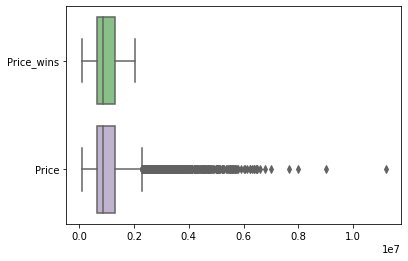

In [42]:
# visualisasi dengan boxplot
sns.boxplot(data=df_win1[["Price_wins", "Price"]], palette="Accent", orient="h")
plt.show()

> deteksi outlier dan menghilangkanya di kolom Distance

In [43]:
# cari outliers baru dengan fungsi IQR
lower_out = find_outliers(df_merged['Distance'])[0]
upper_out = find_outliers(df_merged['Distance'])[1]

In [44]:
print(len(lower_out))
print(len(upper_out))

0
1467


In [45]:
# hitung nilai IQR dan batas atas
iqr = df_merged["Distance"].quantile(.75) - df_merged["Distance"].quantile(.25)
upper_limit = df_merged["Distance"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 25.4


In [46]:
# cari batasan quantile untuk winsorize
df_merged["Distance"].quantile(.95)

24.7

In [47]:
# copy dataframe
df_win2 = df_merged.copy()

In [48]:
df_win2["Distance_wins"] = stats.mstats.winsorize(df_merged["Distance"], limits=(0, 0.05))

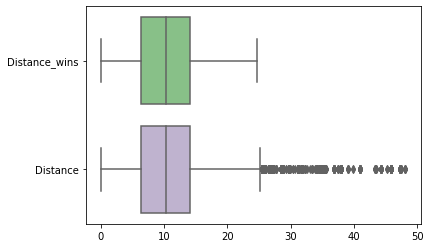

In [49]:
# visualisasi dengan boxplot
sns.boxplot(data=df_win2[["Distance_wins", "Distance"]], palette="Accent", orient="h")
plt.show()

> deteksi outlier dan menghilangkanya di kolom Postcode

In [50]:
# cari outliers baru dengan fungsi IQR
lower_out = find_outliers(df_merged['Postcode'])[0]
upper_out = find_outliers(df_merged['Postcode'])[1]

In [51]:
print(len(lower_out))
print(len(upper_out))

0
959


In [52]:
# hitung nilai IQR dan batas atas
iqr = df_merged["Postcode"].quantile(.75) - df_merged["Postcode"].quantile(.25)
upper_limit = df_merged["Postcode"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 3313.5


In [53]:
# cari batasan quantile untuk winsorize
df_merged["Postcode"].quantile(.97)

3207.0

In [54]:
# copy dataframe
df_win3 = df_merged.copy()

In [55]:
df_win3["Postcode_wins"] = stats.mstats.winsorize(df_merged["Postcode"], limits=(0, 0.03))

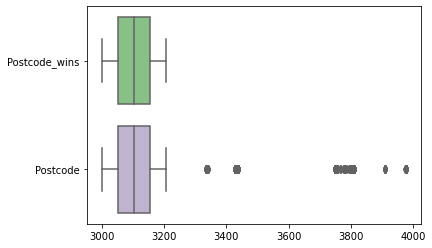

In [56]:
# visualisasi dengan boxplot
sns.boxplot(data=df_win3[["Postcode_wins", "Postcode"]], palette="Accent", orient="h")
plt.show()

> deteksi outlier dan menghilangkanya di kolom Propertycount

In [57]:
# cari outliers baru dengan fungsi IQR
lower_out = find_outliers(df_merged['Propertycount'])[0]
upper_out = find_outliers(df_merged['Propertycount'])[1]

In [58]:
print(len(lower_out))
print(len(upper_out))

0
844


In [59]:
# hitung nilai IQR dan batas atas
iqr = df_merged["Propertycount"].quantile(.75) - df_merged["Propertycount"].quantile(.25)
upper_limit = df_merged["Propertycount"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 19452.5


In [60]:
# cari batasan quantile untuk winsorize
df_merged["Propertycount"].quantile(.97)

17496.0

In [61]:
# copy dataframe
df_win4 = df_merged.copy()

In [62]:
df_win4["Propertycount_wins"] = stats.mstats.winsorize(df_merged["Propertycount"], limits=(0, 0.03))

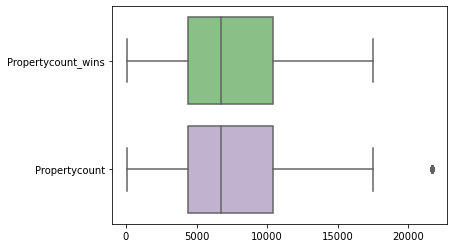

In [63]:
# visualisasi dengan boxplot
sns.boxplot(data=df_win4[["Propertycount_wins", "Propertycount"]], palette="Accent", orient="h")
plt.show()